In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic customer reviews (Jan 2010 - Dec 2015, ~10 reviews/month)
dates = pd.date_range(start='2010-01-01', end='2015-12-01', freq='M')
reviews = []
review_dates = []
positive_reviews = [
    "Love this product! Tastes amazing!!", 
    "Really good food, highly recommend.", 
    "Great quality, will buy again."
]
neutral_reviews = [
    "It’s okay, nothing special.", 
    "Decent product, could be better.", 
    "Average taste, not bad."
]
negative_reviews = [
    "Not impressed, tastes bad.", 
    "Disappointed with the quality.", 
    "Won’t buy again, too bland."
]

for date in dates:
    for _ in range(np.random.randint(8, 12)):  # 8-12 reviews per month
        sentiment = np.random.choice(['positive', 'neutral', 'negative'], p=[0.5, 0.3, 0.2])
        if sentiment == 'positive':
            review = np.random.choice(positive_reviews)
        elif sentiment == 'neutral':
            review = np.random.choice(neutral_reviews)
        else:
            review = np.random.choice(negative_reviews)
        reviews.append(review)
        review_dates.append(date)
        
# Create DataFrame
data = pd.DataFrame({'ds': review_dates, 'review': reviews})

In [3]:
data

,ds,review
0,2010-01-31,"Average taste, not bad."
1,2010-01-31,"It’s okay, nothing special."
2,2010-01-31,"Decent product, could be better."
3,2010-01-31,"Great quality, will buy again."
4,2010-01-31,Love this product! Tastes amazing!!
...,...,...
662,2015-11-30,"Not impressed, tastes bad."
663,2015-11-30,Love this product! Tastes amazing!!
664,2015-11-30,"Won’t buy again, too bland."
665,2015-11-30,"Really good food, highly recommend."


In [4]:
# Step 1: Initialize VADER
analyzer = SentimentIntensityAnalyzer()

In [5]:
# Step 2: Analyze Sentiment
data['sentiment_scores'] = data['review'].apply(analyzer.polarity_scores)
data['compound'] = data['sentiment_scores'].apply(lambda x: x['compound'])
data['neg'] = data['sentiment_scores'].apply(lambda x: x['neg'])
data['neu'] = data['sentiment_scores'].apply(lambda x: x['neu'])
data['pos'] = data['sentiment_scores'].apply(lambda x: x['pos'])

In [7]:
# Step 3: Aggregate Monthly Sentiment
monthly_sentiment = data.groupby(data['ds'].dt.to_period('M')).agg({
    'compound': 'mean',
    'neg': 'mean',
    'neu': 'mean',
    'pos': 'mean'
}).reset_index()

monthly_sentiment['ds'] = monthly_sentiment['ds'].dt.to_timestamp()

In [8]:
monthly_sentiment

,ds,compound,neg,neu,pos
0,2010-01-01,0.517590,0.036700,0.442500,0.520900
1,2010-02-01,0.517489,0.079111,0.398889,0.522111
2,2010-03-01,0.374864,0.079545,0.504727,0.415818
3,2010-04-01,0.462933,0.097222,0.406333,0.496556
4,2010-05-01,0.335562,0.152500,0.416875,0.430750
...,...,...,...,...,...
66,2015-07-01,0.191211,0.135556,0.574222,0.290333
67,2015-08-01,0.377900,0.152500,0.366750,0.480875
68,2015-09-01,0.169862,0.155250,0.510250,0.334750
69,2015-10-01,0.294500,0.119800,0.512000,0.368200


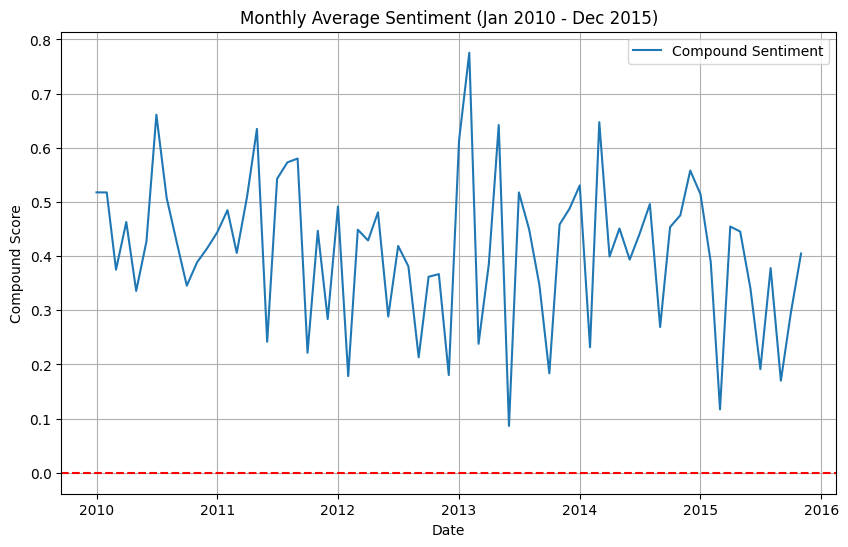

In [ ]:
# Step 4: Visualize Monthly Compound Sentiment
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiment['ds'], monthly_sentiment['compound'], label='Compound Sentiment')
plt.axhline(0, color='red', linestyle='--')
plt.title('Monthly Average Sentiment (Jan 2010 - Dec 2015)')
plt.xlabel('Date')
plt.ylabel('Compound Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 6: Example Integration with Prophet
# For illustration, show how sentiment could be used as a regressor
prophet_data = pd.DataFrame({
    'ds': monthly_sentiment['ds'],
    'y': 125 + 0.9 * np.random.normal(0, 28, len(dates)).cumsum() + np.random.normal(0, 10, len(dates)),
    'sentiment': monthly_sentiment['compound']
})
print("\nSample Data for Prophet with Sentiment Regressor:")
print(prophet_data.head())


Sample Data for Prophet with Sentiment Regressor:
          ds           y  sentiment
0 2010-01-01  144.282522   0.517590
1 2010-02-01  136.358502   0.517489
2 2010-03-01  150.022417   0.374864
3 2010-04-01  179.911889   0.462933
4 2010-05-01  207.452338   0.335562
